In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML


! pip install folium==0.5.0
import folium # plotting library

!pip install lxml
from lxml import html

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 12.2 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=af901e93aa82c7cccb4e00ec7486f4a4b5b6492e497d26800c803d6c357b7bff
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [2]:
#import Data from Wikipedia
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
df=data[0]

In [3]:
data[0]

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [4]:
#Cleaning the data - taking out the not assinged Boroughs
df_2 = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
df_2.rename(columns={'Neighbourhood' : 'Neighborhood'}, inplace=True)
df_2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [5]:
#importing latitude and longitude data
df_ll=pd.read_csv("https://cocl.us/Geospatial_data")
df_ll.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
#merging the latitude and longitude with the neighborhood dataset to creat a new dataset
outer_merged = pd.merge(df_2, df_ll, how="outer", on=["Postal Code"])
outer_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [7]:
# renaming the dataset
toronto_data = outer_merged[outer_merged['Borough'].astype(str).str.contains('Toronto')]
toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [28]:
CLIENT_ID =   # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
ACCESS_TOKEN =  # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
raduis = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

SyntaxError: invalid syntax (<ipython-input-28-c306bd107edc>, line 1)

In [9]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [10]:
#toronto latitude and lognitude
latitude = 43.6534817 
longitude = -79.3839347

In [11]:
# Getting nearby venues from foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [12]:
# Venue names
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [13]:
print(toronto_venues.shape)
toronto_venues.head()

(851, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [14]:
# coding the data and reindexing the data for clustering
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 


cols = toronto_onehot.columns.tolist()
cols


cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols


toronto_onehot = toronto_onehot.reindex(columns= cols)


toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# updated data grouped by neighborhood
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,Central Bay Street,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333


In [16]:
toronto_venues_filtered = toronto_grouped[["Neighborhood","Bakery"]]
toronto_venues_filtered

,Neighborhood,Bakery
0,Berczy Park,0.033333
1,"Brockton, Parkdale Village, Exhibition Place",0.043478
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.000000
5,Christie,0.000000
6,Church and Wellesley,0.000000
7,"Commerce Court, Victoria Hotel",0.033333
8,Davisville,0.000000
9,Davisville North,0.000000


In [18]:
#Making a datafram for clustering
toronto_grouped_clustering = toronto_venues_filtered.drop('Neighborhood', 1)

In [19]:
inertias = []
for k in range(1,10):
    k_op = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    inertias.append(k_op.inertia_)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  app.launch_new_instance()


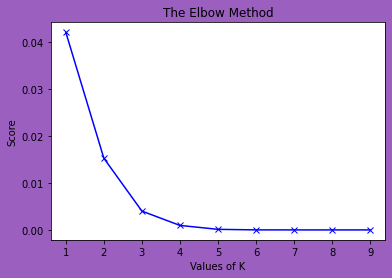

In [20]:
K=range(1,10)
fig=plt.figure()
fig.patch.set_facecolor('xkcd:amethyst')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('The Elbow Method')
plt.show()

In [21]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [22]:
toronto_merged = toronto_venues_filtered.copy() 

toronto_merged["Cluster Labels"] = kmeans.labels_

In [23]:
toronto_merged = toronto_merged.join(toronto_data.set_index("Neighborhood"), on=("Neighborhood"))

print(toronto_merged.shape)

toronto_merged.head()

(39, 7)


,Neighborhood,Bakery,Cluster Labels,Postal Code,Borough,Latitude,Longitude
0,Berczy Park,0.033333,2,M5E,Downtown Toronto,43.644771,-79.373306
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,2,M6K,West Toronto,43.636847,-79.428191
2,"Business reply mail Processing Centre, South C...",0.000000,0,M7Y,East Toronto,43.662744,-79.321558
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420
4,Central Bay Street,0.000000,0,M5G,Downtown Toronto,43.657952,-79.387383


In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [25]:
toronto_merged[toronto_merged['Cluster Labels']== 0]

,Neighborhood,Bakery,Cluster Labels,Postal Code,Borough,Latitude,Longitude
2,"Business reply mail Processing Centre, South C...",0.0,0,M7Y,East Toronto,43.662744,-79.321558
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0,M5V,Downtown Toronto,43.628947,-79.394420
4,Central Bay Street,0.0,0,M5G,Downtown Toronto,43.657952,-79.387383
5,Christie,0.0,0,M6G,Downtown Toronto,43.669542,-79.422564
6,Church and Wellesley,0.0,0,M4Y,Downtown Toronto,43.665860,-79.383160
8,Davisville,0.0,0,M4S,Central Toronto,43.704324,-79.388790
9,Davisville North,0.0,0,M4P,Central Toronto,43.712751,-79.390197
12,"Forest Hill North & West, Forest Hill Road Park",0.0,0,M5P,Central Toronto,43.696948,-79.411307
14,"Harbourfront East, Union Station, Toronto Islands",0.0,0,M5J,Downtown Toronto,43.640816,-79.381752
16,"India Bazaar, The Beaches West",0.0,0,M4L,East Toronto,43.668999,-79.315572


In [26]:
toronto_merged[toronto_merged['Cluster Labels']== 1]

,Neighborhood,Bakery,Cluster Labels,Postal Code,Borough,Latitude,Longitude
10,"Dufferin, Dovercourt Village",0.153846,1,M6H,West Toronto,43.669005,-79.442259
24,"Regent Park, Harbourfront",0.100000,1,M5A,Downtown Toronto,43.654260,-79.360636


In [27]:
toronto_merged[toronto_merged['Cluster Labels']== 2]

,Neighborhood,Bakery,Cluster Labels,Postal Code,Borough,Latitude,Longitude
0,Berczy Park,0.033333,2,M5E,Downtown Toronto,43.644771,-79.373306
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,2,M6K,West Toronto,43.636847,-79.428191
7,"Commerce Court, Victoria Hotel",0.033333,2,M5L,Downtown Toronto,43.648198,-79.379817
11,"First Canadian Place, Underground city",0.033333,2,M5X,Downtown Toronto,43.648429,-79.382280
13,"Garden District, Ryerson",0.033333,2,M5B,Downtown Toronto,43.657162,-79.378937
15,"High Park, The Junction South",0.040000,2,M6P,West Toronto,43.661608,-79.464763
17,"Kensington Market, Chinatown, Grange Park",0.033333,2,M5T,Downtown Toronto,43.653206,-79.400049
19,"Little Portugal, Trinity",0.033333,2,M6J,West Toronto,43.647927,-79.419750
25,"Richmond, Adelaide, King",0.033333,2,M5H,Downtown Toronto,43.650571,-79.384568
30,"St. James Town, Cabbagetown",0.066667,2,M4X,Downtown Toronto,43.667967,-79.367675
